# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/content/Historical Product Demand.csv')

# Load the data into a dataframe

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0


# Data Understanding

In [4]:
df.shape

(42268, 5)

In [5]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [6]:
df.Product_Code.unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0403', 'Product_0470', 'Pro'], dtype=object)

In [7]:
df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A', nan], dtype=object)

In [8]:
df.Product_Category.nunique()

26

# Data Cleaning

In [9]:
df.dtypes

,0
Product_Code,object
Warehouse,object
Product_Category,object
Date,object
Order_Demand,float64


In [10]:
def check_order_demand(x):
    try:
        int(x)
    except:
        return False
    return True
#Check where Order_demand is not an integer
df[~df.Order_Demand.apply(lambda x: check_order_demand(x))].head(6)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
42267,Pro,NaN,NaN,NaN,NaN


In [11]:
# Convert the Order_demand to an Integer
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])
check = '(10)'
change_to_int(check)

10

In [12]:
# Convert the Order_demand to an Integer
def change_to_int(x):
    try:
        return int(float(x))  # Handle potential float strings
    except ValueError:
        if pd.isna(x):  # Check for NaN and replace with a default value
            return 0  # Or any other suitable default
        else:
            try:
                return int(x[1:-1])  # Handle strings with parentheses
            except:
                return None  # Handle other unexpected formats

# Apply the function and handle potential None values
df.Order_Demand = df.Order_Demand.apply(lambda x: change_to_int(x)).fillna(0)

In [13]:
df.describe()

,Order_Demand
count,4.226800e+04
mean,1.165465e+04
std,5.173527e+04
min,0.000000e+00
25%,2.000000e+02
50%,1.200000e+03
75%,8.575000e+03
max,4.000000e+06


In [14]:
# Rename the columns
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [15]:
# Check for missing data
df.isna().sum()

,0
Code,0
Warehouse,1
Category,1
Date,1
Demand,0


In [16]:
100 * df.isna().sum()[3]/ df.shape[0]

<ipython-input-16-416901b98ca8>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  100 * df.isna().sum()[3]/ df.shape[0]


0.002365855966688748

In [17]:
# 1% of the data has missing value so we can drop all the na
df = df.dropna()
df.isna().sum()

,0
Code,0
Warehouse,0
Category,0
Date,0
Demand,0


In [18]:
# Check the length of time the data was collected
df.Date.min(), df.Date.max()

('2011/11/25', '2013/1/7')

The data was collected from January 8th, 2011 to January 9th, 2017

In [19]:
df.Date.sort_values().unique()[:10]

array(['2011/11/25', '2011/11/29', '2011/12/12', '2011/12/13',
       '2011/12/14', '2011/12/15', '2011/12/16', '2011/12/19',
       '2011/12/20', '2011/12/21'], dtype=object)

In [20]:
# Set index to Date and Variable
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

#  Dealing with  irregularly sampled datasets.

There are few techniques we can use to deal with irregulary samples datasets
- Interpolate the time series data i.e. predict what those missing data by assuming that data samples behave monotonically
  at each interval. this assumption doesn’t hold then it may lead to many artifacts or misleading results.
- Resample the data, we may lose some data

# Univariate Analysis

<Axes: xlabel='Warehouse', ylabel='count'>

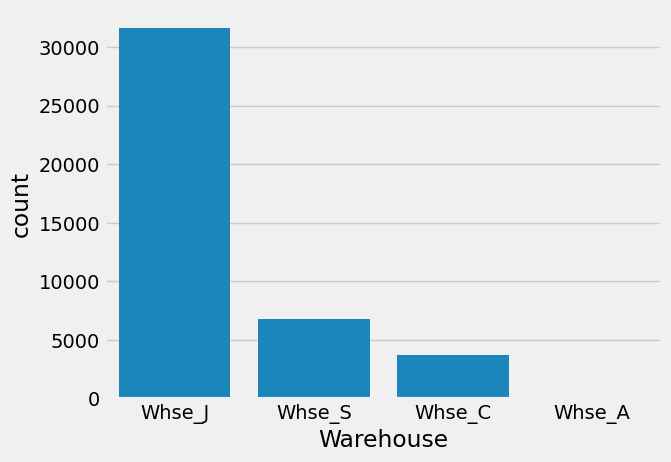

In [21]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

This bar plot compares the count the numbers of orders by warehouses. Warehouses Whse_J has significantly more orders than the other warehouses with nearly 750,000 orders followed by Whse_A, then Whse_S and Whse_C

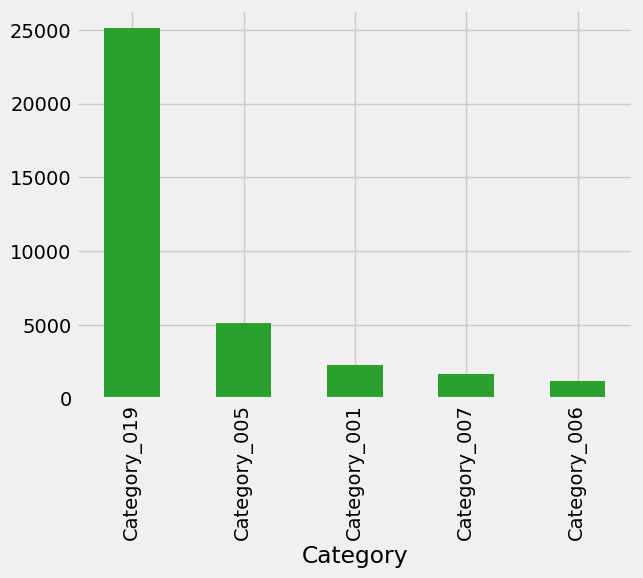

In [22]:
# Plot the 5 most popular category
df.Category.value_counts().head(5).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Category')
plt.show()

As shown on this plot, Category 019 ships by far the most orders in the product category

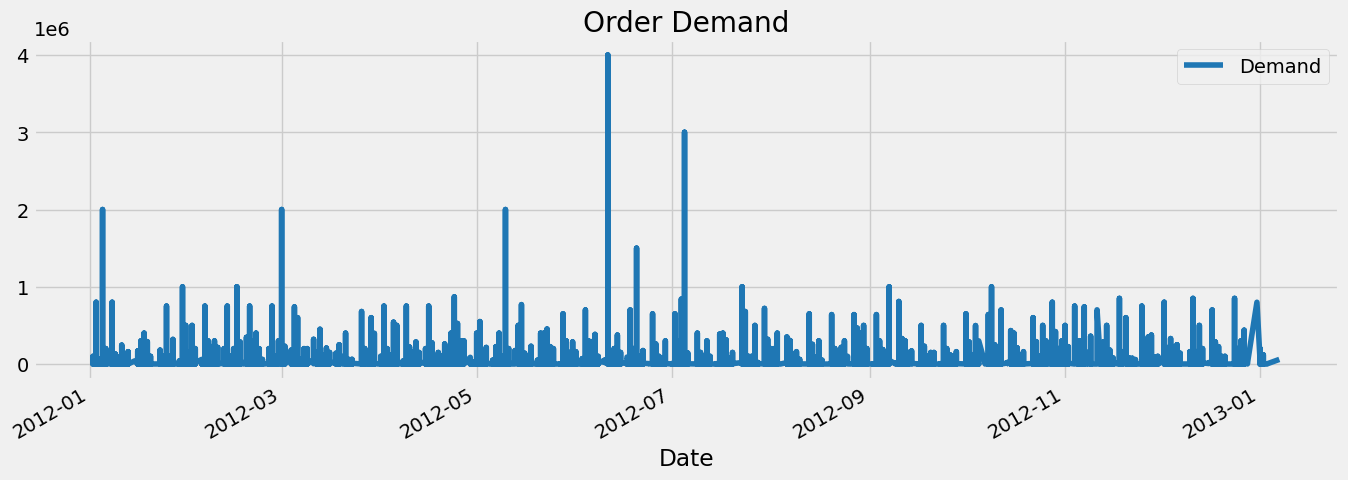

In [24]:
#This data have a lot of missing data before January 1st, 2012
df_new = df.loc[df.index >= '01-01-2012']
df_new.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

In [25]:
# Find the skewness in the data
df.Demand.skew()

26.311207182334954

# Bivariate Analysis/ Multivariate Analysis

In [26]:
# Total Demand by Warehouse
warehouse_Demand = df.groupby('Warehouse')['Demand'].sum()
warehouse_Demand

,Demand
Warehouse,
Whse_A,183106
Whse_C,63080503
Whse_J,271150854
Whse_S,158204239


<Axes: ylabel='Sum of the demand'>

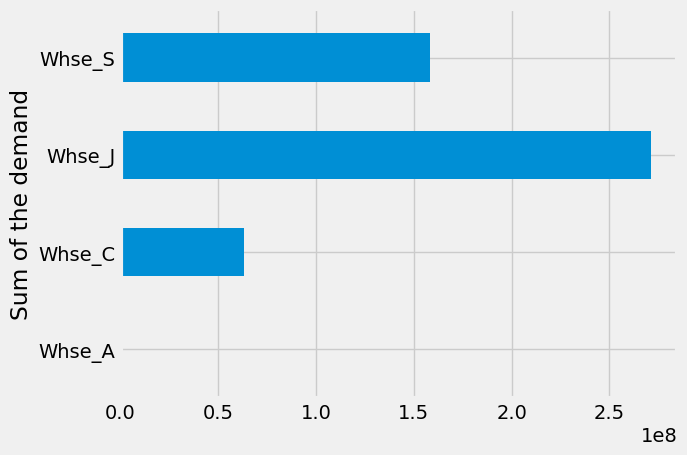

In [27]:
warehouse_Demand.plot(kind = 'barh', ylabel = 'Sum of the demand' )

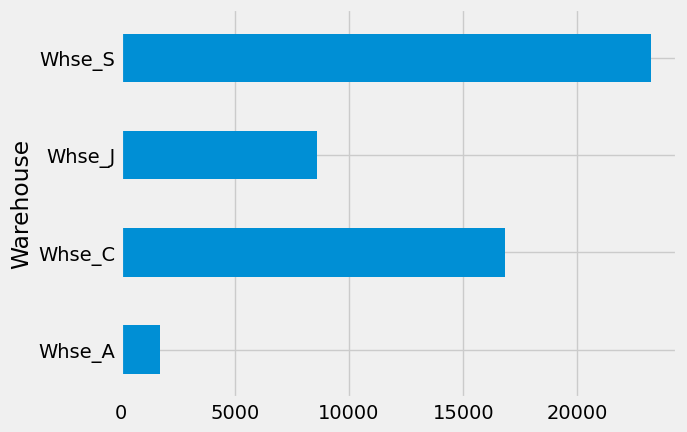

In [28]:
# Average Demand by Warehouse
df.groupby('Warehouse')['Demand'].mean().plot(kind = 'barh')
plt.show()

Although Warehouse Whse_J has the most orders, Whse_C and Whse_A shipped the most product per order on average. This can
helpful when we want to reduce the cost of operation and shipping for instance.

In [29]:
df.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


# Feature Engineering

In [30]:
" Function that create time series features using the index columns"
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df_new)
df.dtypes

,0
Code,object
Warehouse,object
Category,object
Demand,int64
day_of_the_week,int32
Quarter,int32
Month,int32
Year,int32
Week,int64


In [31]:
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']

# Create our model using XGboost

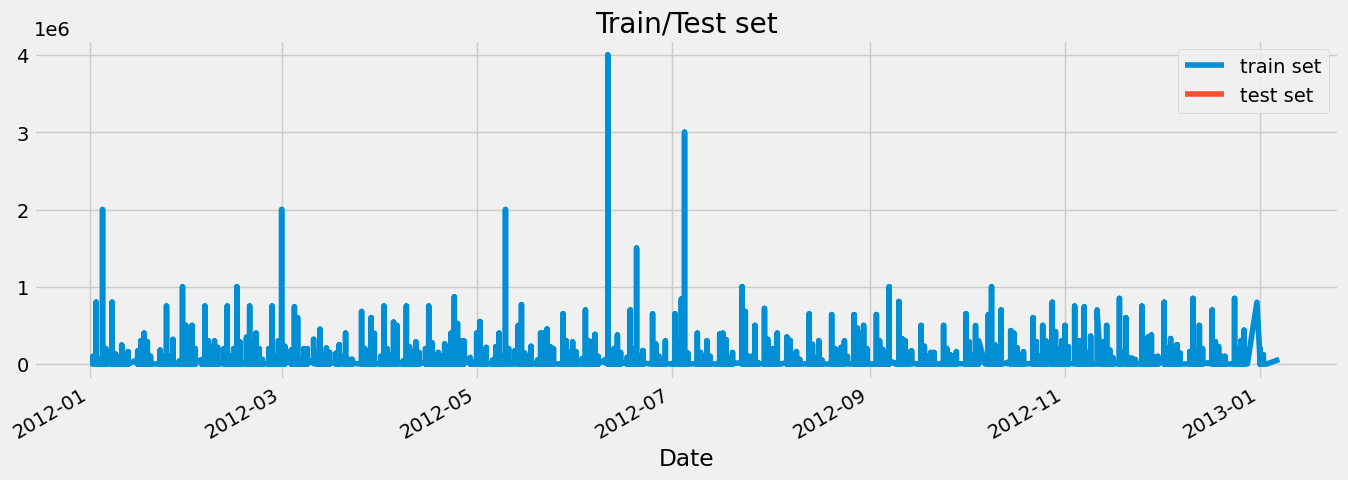

In [33]:
# Split the data in Train/ Test set
df_train = df.loc[df.index <= '2016-01-01'].copy()
df_test = df.loc[df.index > '2016-01-01'].copy()

#plot train/test
fig, ax = plt.subplots(figsize = (15,5))
df_train.Demand.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
df_test.Demand.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [34]:
#Split the data into training set and testing set
X_train = df_train[Features]
X_test = df_test[Features]

y_train = df_train[target]
y_test = df_test[target]

In [37]:
! pip install xgboost

In [38]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000,
                    early_stopping_rounds = 50,
                    learning_rate = 0.01).fit(X_train, y_train,
                                                   eval_set = [(X_train,y_train), (X_test,y_test)],
                                                   verbose = 50)

[0]	validation_0-rmse:51253.62166	validation_1-rmse:0.00000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:04:50] WARNING: /workspace/src/common/error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)


[50]	validation_0-rmse:51065.71921	validation_1-rmse:0.00000


- Model stopped after 315 trees because our validation rmse start to go up (overfitting)

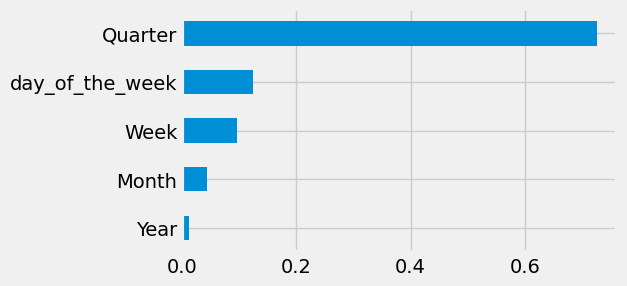

In [39]:
# Features Importance
fea_Imp = pd.DataFrame(model.feature_importances_, index = Features, columns = ['feature_importance'])
#plot the features importance
fea_Imp.feature_importance.sort_values().plot(kind = 'barh', figsize =(5,3))
plt.show()

# Forecast on Test

In [40]:
df_test['prediction'] = model.predict(X_test)

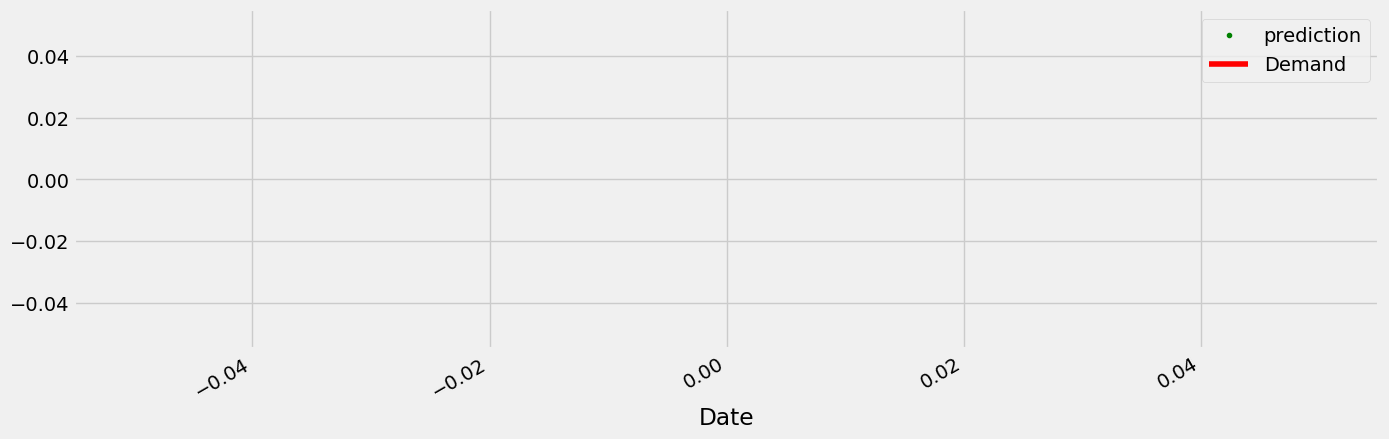

In [41]:
fig, ax = plt.subplots( figsize = (15,5))
df_test.prediction.plot(ax = ax, color = 'g', style = '.', legend = 'Prediction')
df_test.Demand.plot(ax = ax, color = 'r', legend = 'Testing')
plt.show()

We barely can see the prediction, XGboost did really bad at capturing the trend and seasonlity in the data. Let's use
a more robust machine learning technique

# Time Series Analysis

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.
In time series analysis, analysts record data points at consistent intervals over a set period of time rather than
just recording the data points intermittently or randomly.

# Visualise Features/ Target Relationship

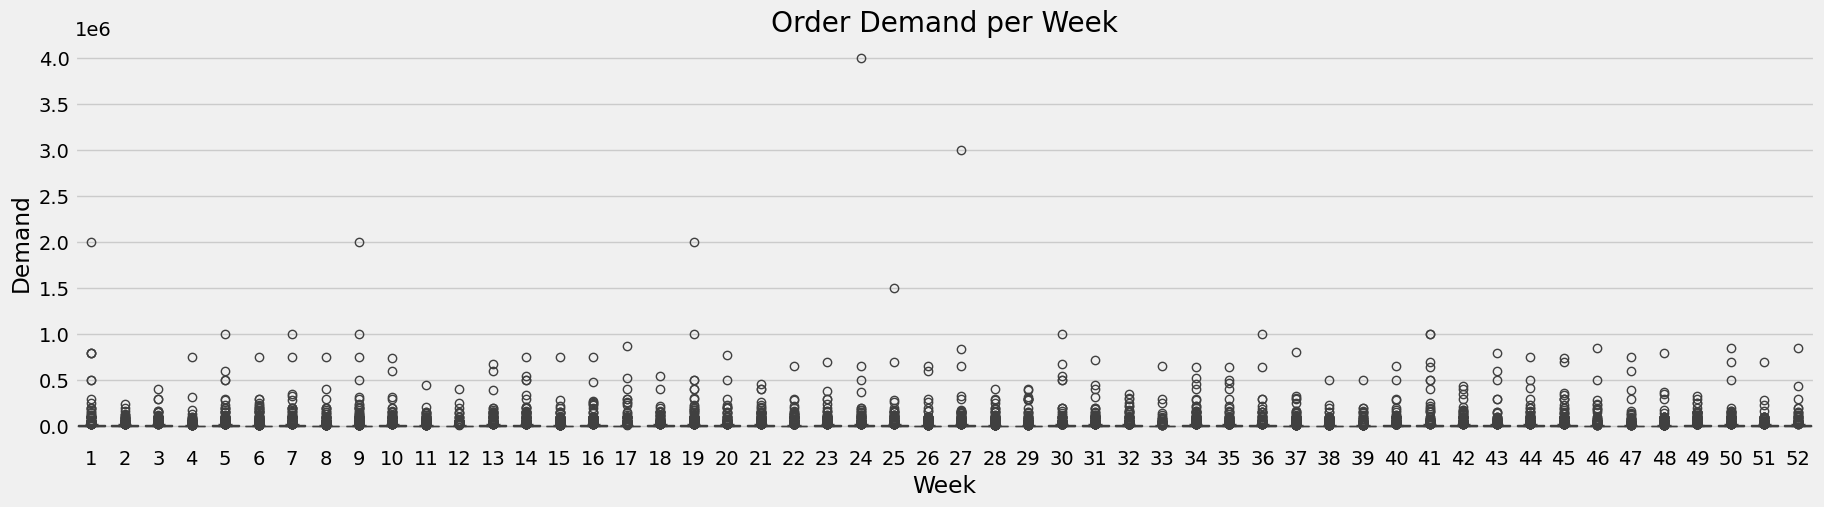

In [42]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Week', y='Demand')
ax.set_title('Order Demand per Week')
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

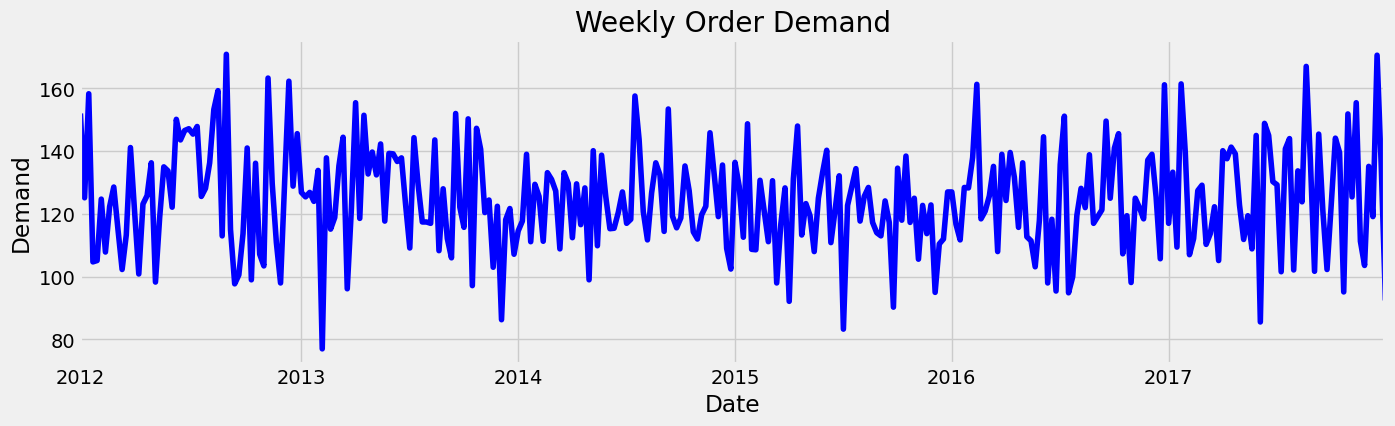

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with a date range from 2012 to 2017
np.random.seed(42)  # For reproducibility
data = {'Date': pd.date_range(start='2012-01-01', end='2017-12-31', freq='D'),
        'Demand': np.random.randint(50, 200, size=2192),  # Random demand values with more variation
        'Product': ['A', 'B'] * 1096}  # Alternating between 'A' and 'B'
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Resample data as Weekly, handling non-numeric columns
df_week = df.resample('W').agg({'Demand': 'mean', 'Product': 'first'})

# Plot the 'Demand' column
df_week['Demand'].plot(figsize=(15, 4), title='Weekly Order Demand', color='blue')
plt.ylabel('Demand')
plt.show()


- These data show a seasonal pattern. The pattern repeats every 12 months. The demand increase in December(probably due to the holiday season) and decrease probably in January.
- I can see a pattern in the weekly order demand, Let's explore the monthly pattern by sampling the data monthly

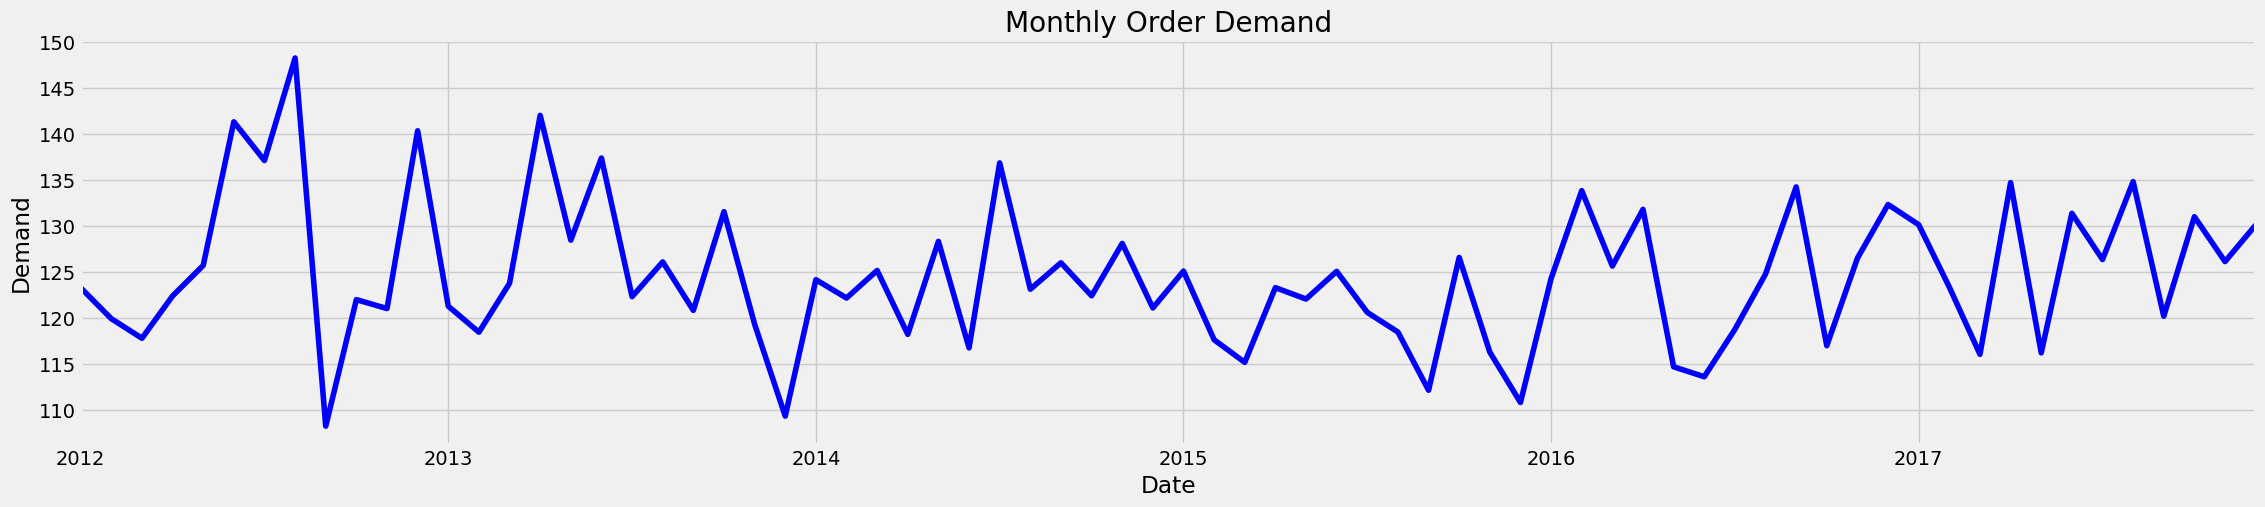

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with a date range from 2012 to 2017
np.random.seed(42)  # For reproducibility
data = {'Date': pd.date_range(start='2012-01-01', end='2017-12-31', freq='D'),
        'Demand': np.random.randint(50, 200, size=2192),  # Random demand values with more variation
        'Product': ['A', 'B'] * 1096}  # Alternating between 'A' and 'B'
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Resample data as Monthly, handling non-numeric columns
df_month = df.resample('MS').agg({'Demand': 'mean', 'Product': 'first'})

# Plot the 'Demand' column
df_month.Demand.plot(figsize=(25, 5), title='Monthly Order Demand', color='blue')
plt.ylabel('Demand')
plt.show()


This plot shows a clear upward trend from the last quarter of 2013 to the beginning of 2017...

# Decomposition  to check the seasonality, trends and residuals.

# Visually, the time series is non-stationary but I will perform the Augmented Dickey- Adfuller test (ADF) to make sure of that

Date range of the dataset: 2012-01-01 00:00:00 to 2017-12-31 00:00:00


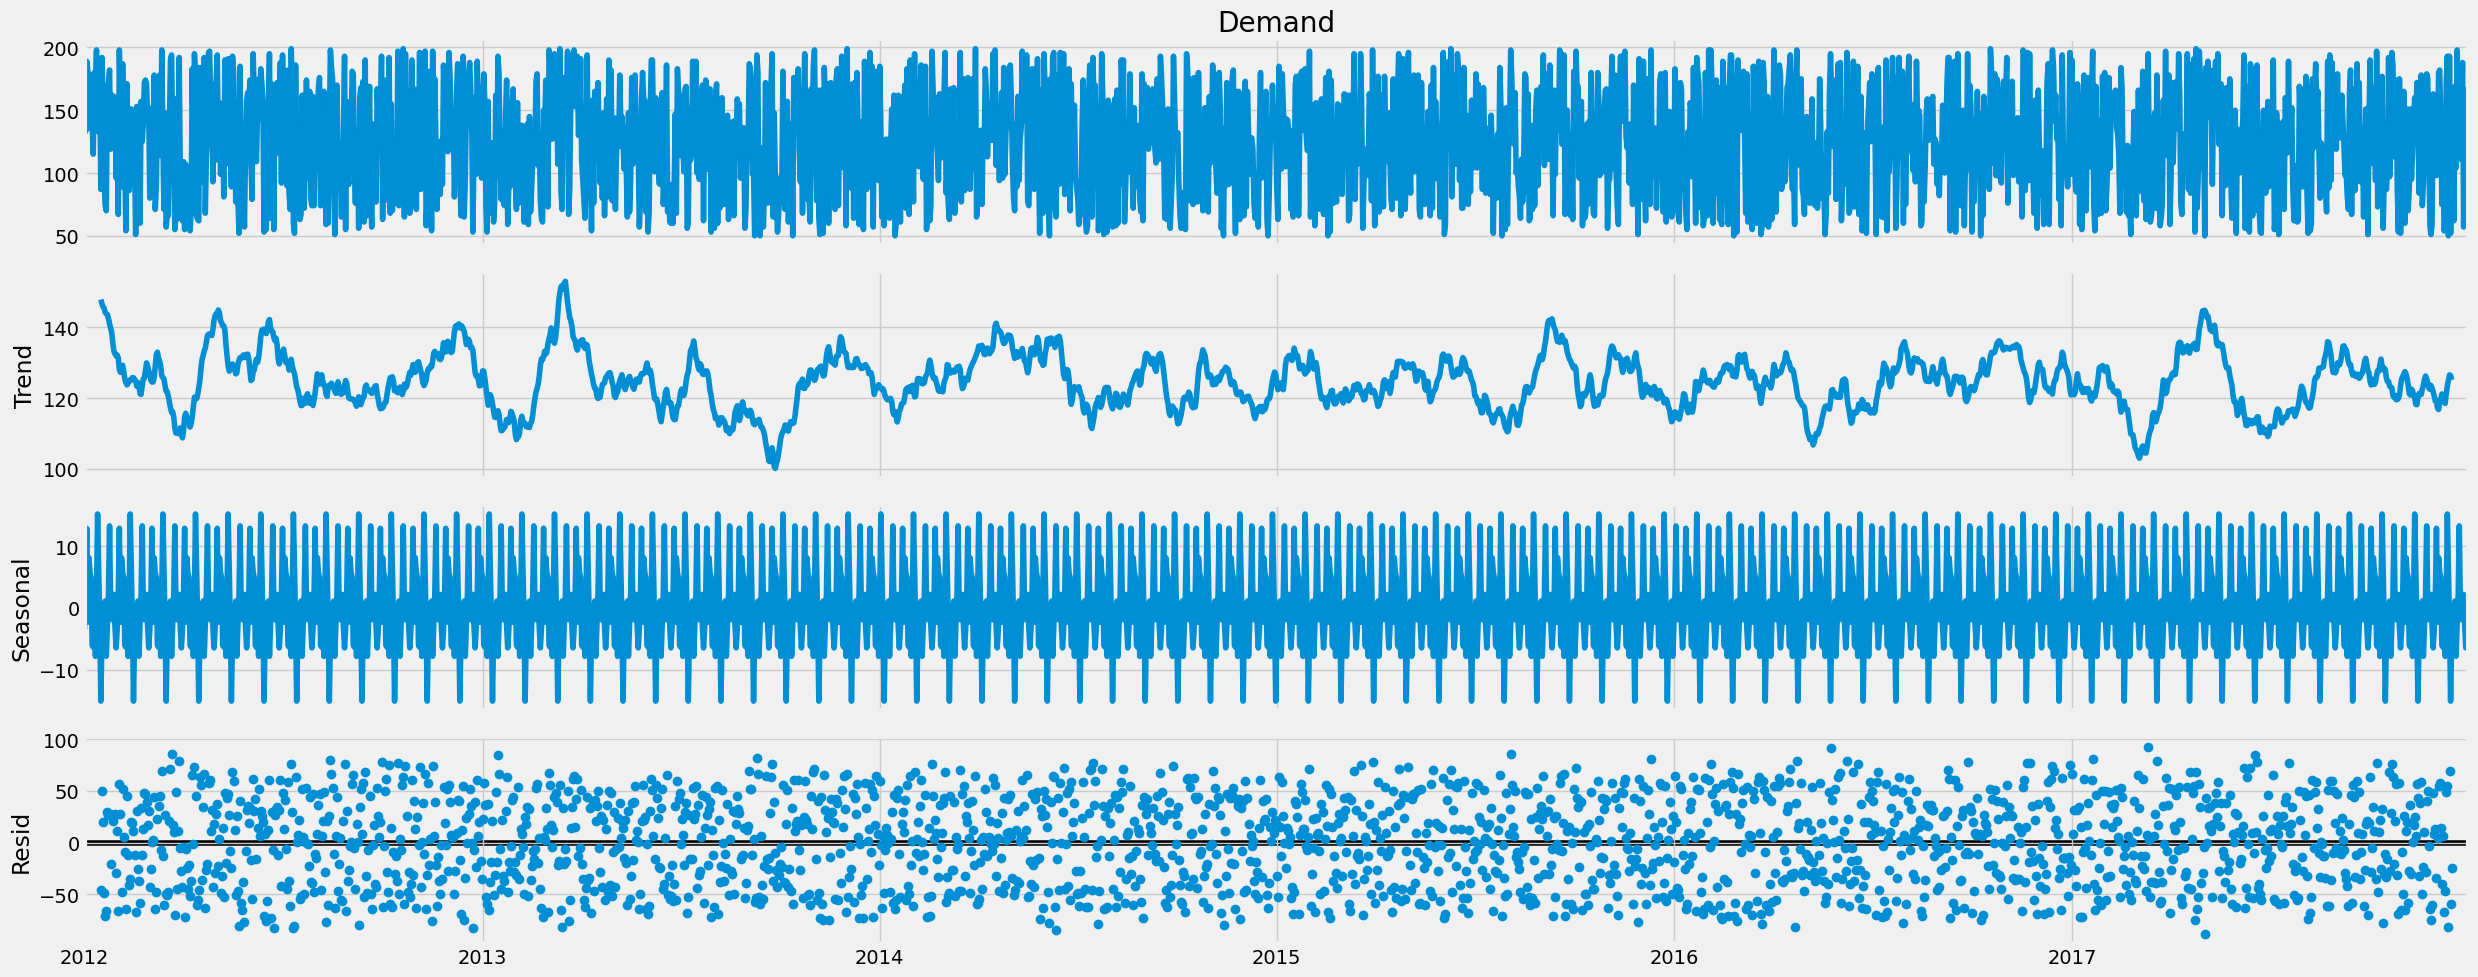

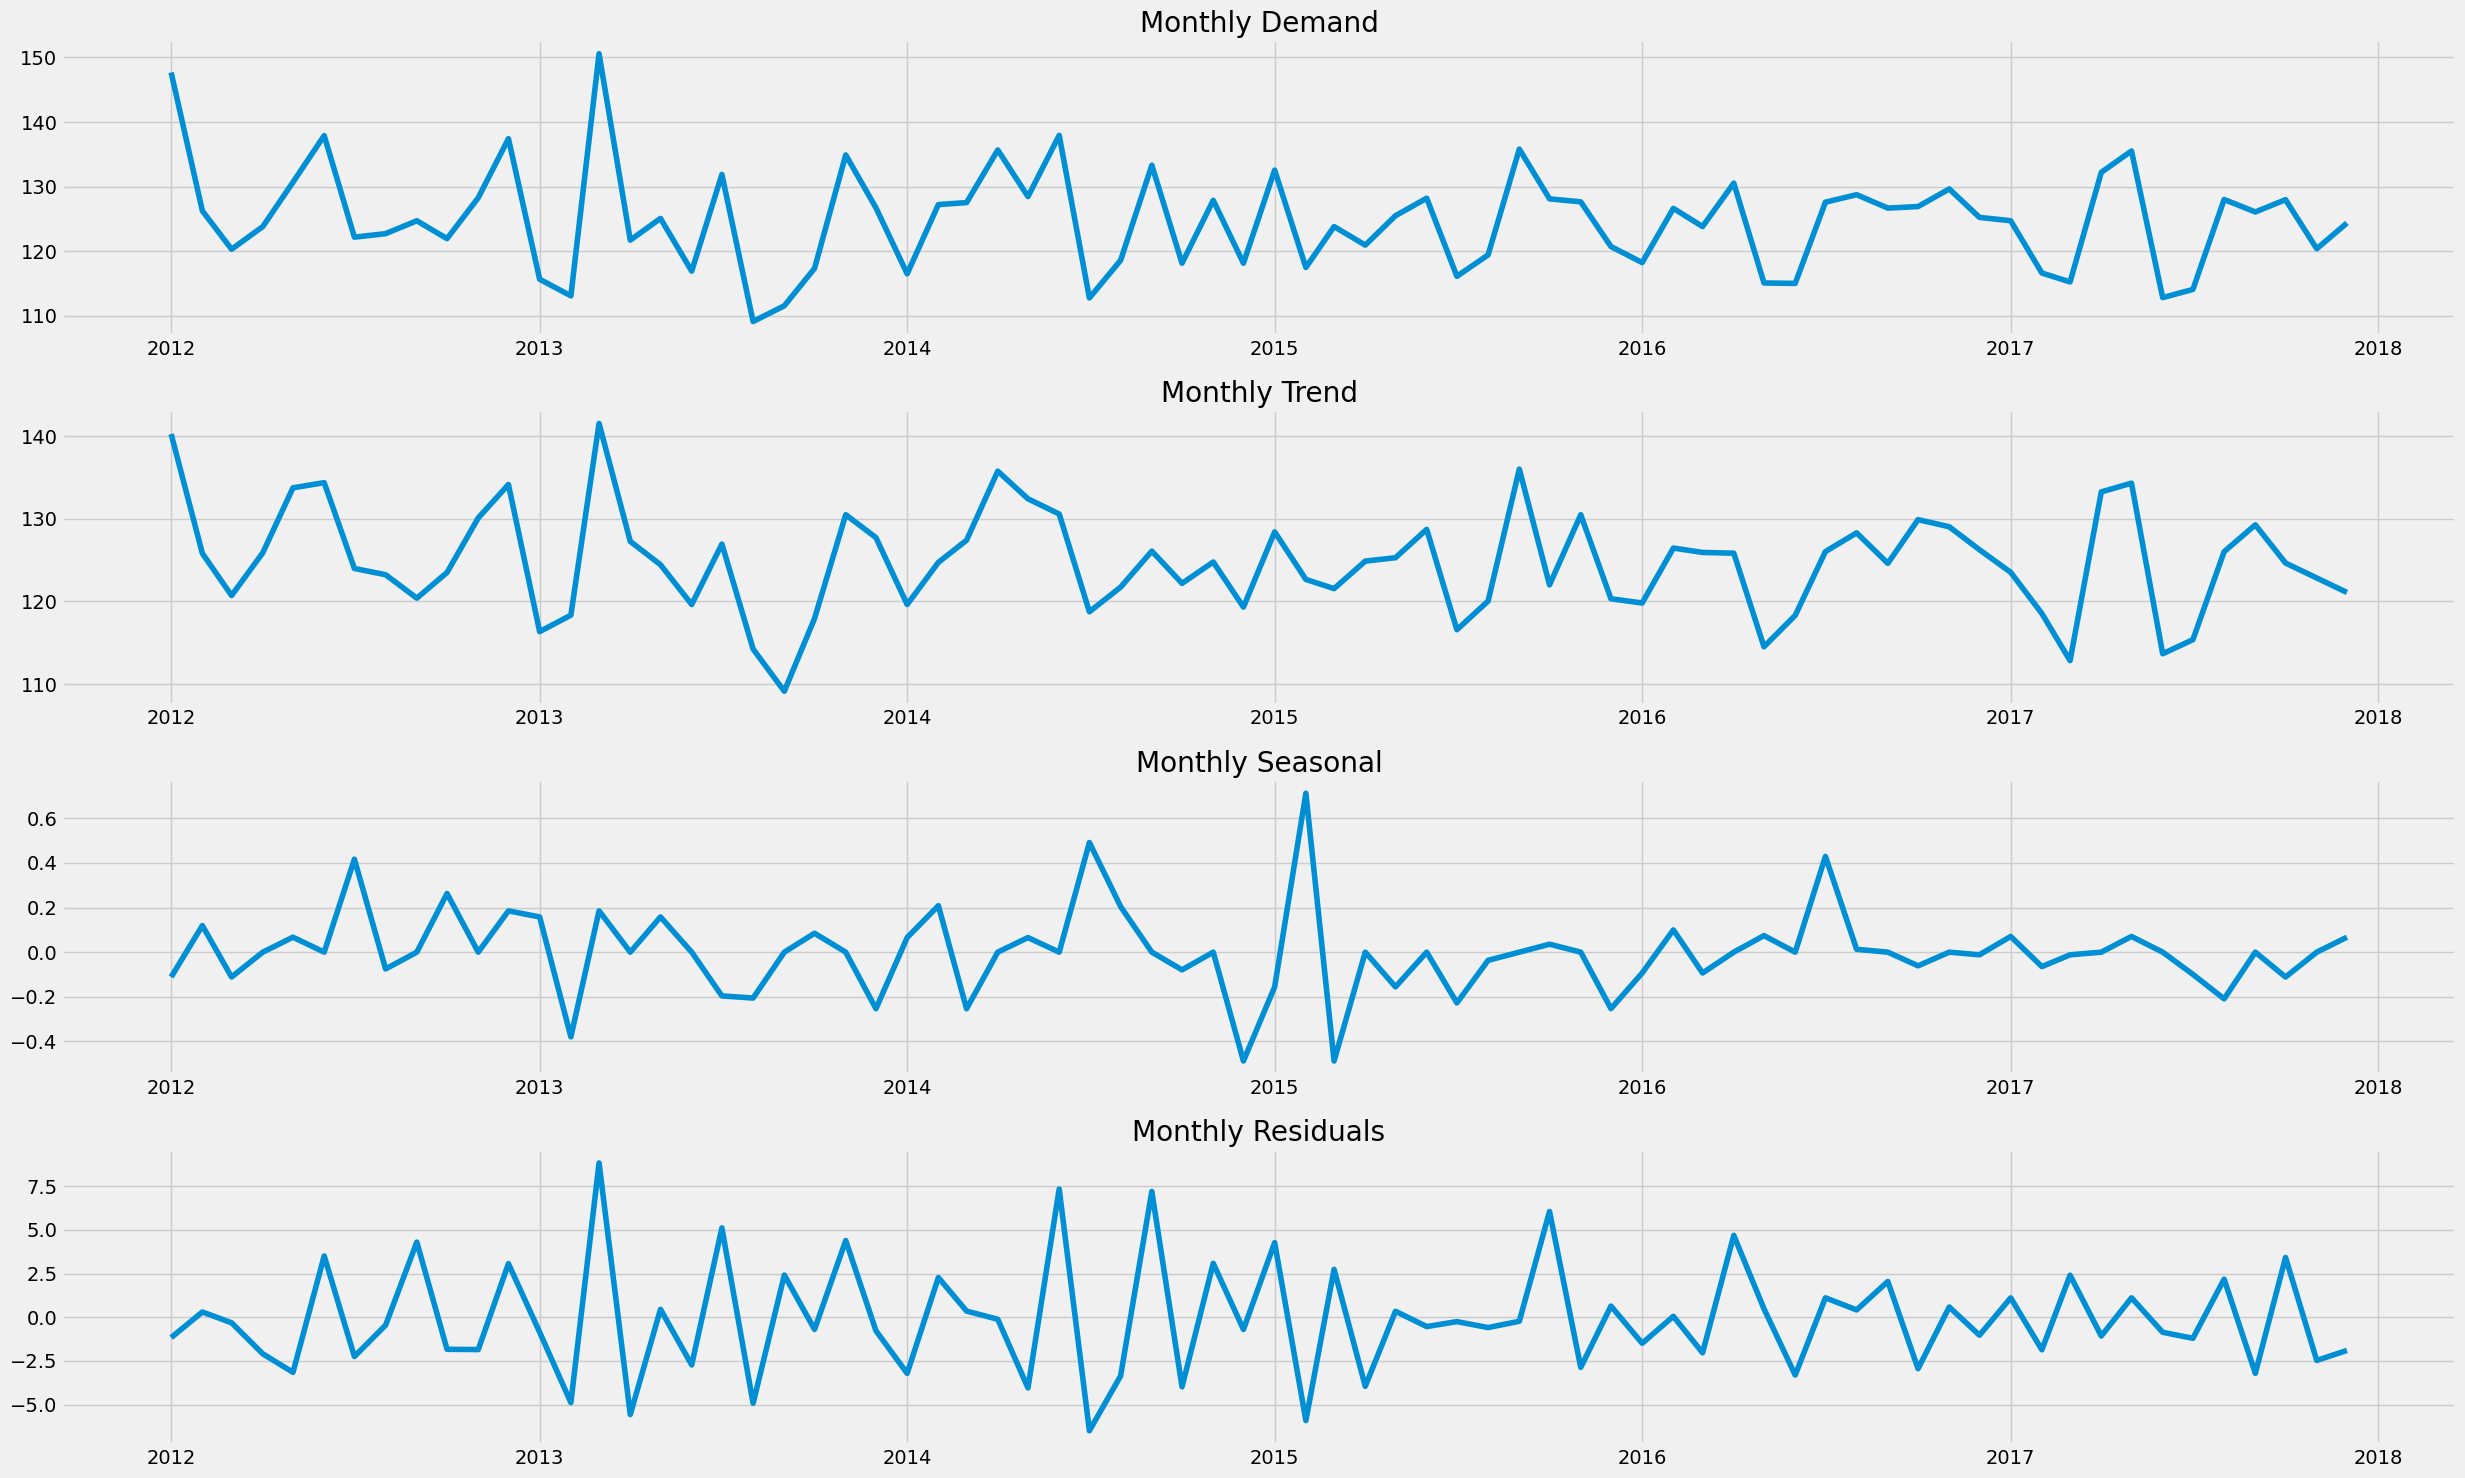

In [51]:
!pip install pandas matplotlib statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

# Sample DataFrame with a date range from 2012 to 2017
data = {'Date': pd.date_range(start='2012-01-01', end='2017-12-31', freq='D'),
        'Demand': np.random.randint(50, 200, size=2192),  # Random demand values with more variation
        'Product': ['A', 'B'] * 1096}  # Alternating between 'A' and 'B'
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Print the date range of the dataset
print("Date range of the dataset:", df.index.min(), "to", df.index.max())

# Perform seasonal decomposition on DAILY data
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df.Demand, model='additive', period=30)  # Period set to 30 for daily seasonality

# Plot the decomposed components (still at daily frequency)
fig = decomposition.plot()
plt.show()

# Resample the decomposed components to monthly frequency
decomposition_month = {
    'trend': decomposition.trend.resample('MS').mean(),
    'seasonal': decomposition.seasonal.resample('MS').mean(),
    'resid': decomposition.resid.resample('MS').mean()
}

# Plot the monthly decomposed components
fig, axes = plt.subplots(4, 1, figsize=(25, 15))

# Resample the DataFrame, excluding the 'Product' column for the mean calculation
df_month = df['Demand'].resample('MS').mean()
axes[0].plot(df_month)  # Monthly demand data
axes[0].set_title('Monthly Demand')

axes[1].plot(decomposition_month['trend'])
axes[1].set_title('Monthly Trend')
axes[2].plot(decomposition_month['seasonal'])
axes[2].set_title('Monthly Seasonal')
axes[3].plot(decomposition_month['resid'])
axes[3].set_title('Monthly Residuals')
plt.tight_layout()
plt.show()

In [53]:
# import stats libraries
from statsmodels.tsa.stattools import adfuller
adfuller(df_month) # df_month is already a Series with the demand values

(-6.7668939460541715,
 2.7028296315101213e-09,
 2,
 69,
 {'1%': -3.528889992207215,
  '5%': -2.9044395987933362,
  '10%': -2.589655654274312},
 410.8166942542092)

- The p-value is obtained is greater than significance level of 0.05
- Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

# Make Series Stationnary

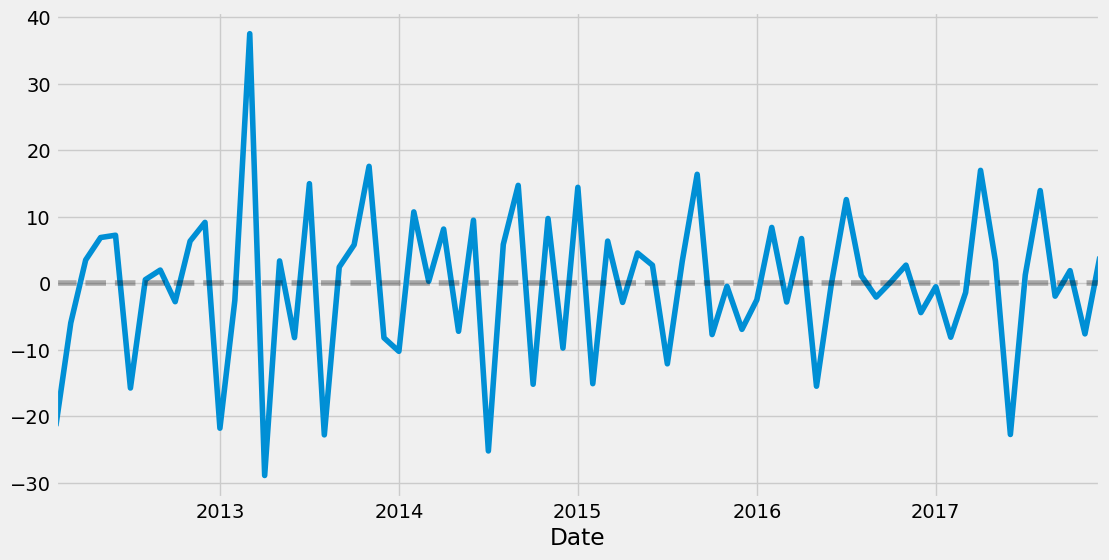

In [55]:
# Take First Difference to Remove Trend
df_diff = df_month.diff()[1:]  # Directly apply diff() to the df_month Series
df_diff.plot(figsize=(12, 6))  # Removed color argument as color_pal is not defined
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [56]:
# Augmented Dicker Fuller Test to check if this new series is stationnary after differentiation
adfuller(df_diff)

(-5.01076698773295,
 2.112960985321458e-05,
 12,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 418.02794807096797)

The p-value is less than 0.05 so data series is stationnary

# Build ARIMA Model

- ARIMA models are generally denoted as ARIMA (p,d,q) where:
    - p is the order of autoregressive model (Forecasts future behavior based on past behavior data)
    - d is the degree of differencing(Integrating or eleminate trend in the data)
    - and q is the order of moving-average model(Past errors to predict the future)
- ARIMA models use differencing to convert a non-stationary time series into a stationary one,
    and then predict future values from historical data.
- Ways to determine p,q,d:
    - Using ACF And PCAF plots to find p,q and d is how many times we differenciate the data
    - Auto_Arima function tries different orders and determine the best model based on AIC criteria(lowest AIC)
    - For Loop

### 1) ACF and PACF plots and Interpretation

In [57]:
# Import libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

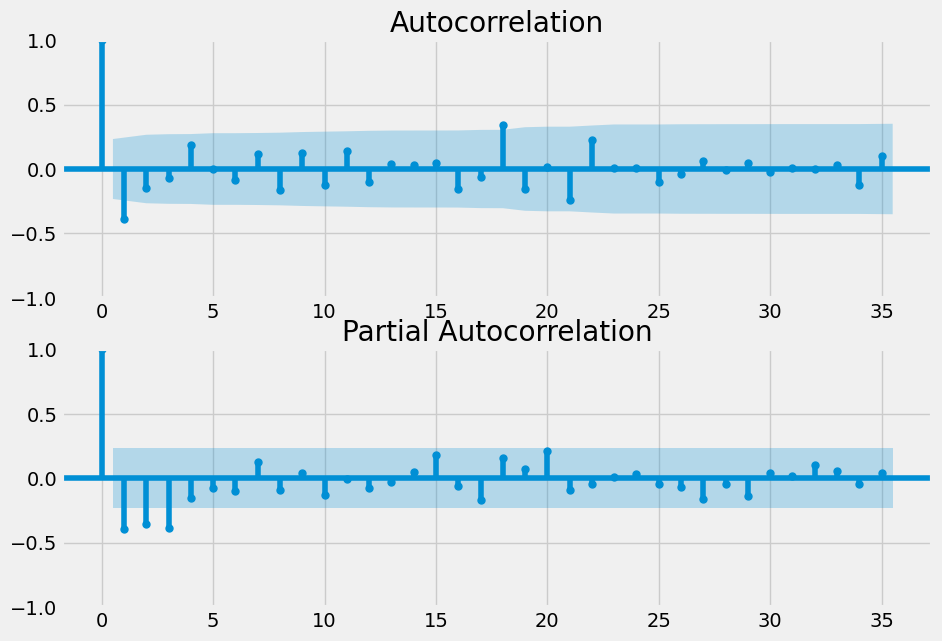

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# Calculate the maximum number of lags allowed
max_lags = len(df_diff) // 2

plot_acf(df_diff, lags=max_lags, ax=ax1)
plot_pacf(df_diff, lags=max_lags, method='ywm', ax=ax2)  # Use max_lags here
plt.show()

Based on the AutoCorrelation chart:
- Lag 1 is strong(cross the Confidence Interval) so the order of q  is 1
- Based on the Partial AutoCorrelation chart, Lag 1 and 2 are strong(cross the Confidence Interval) so the order of p is 2
- I differentiate only once to make the series stationnary so d is 1

### 2) Train / Test split

Shape of df_train: (48,)
Shape of df_test: (13,)


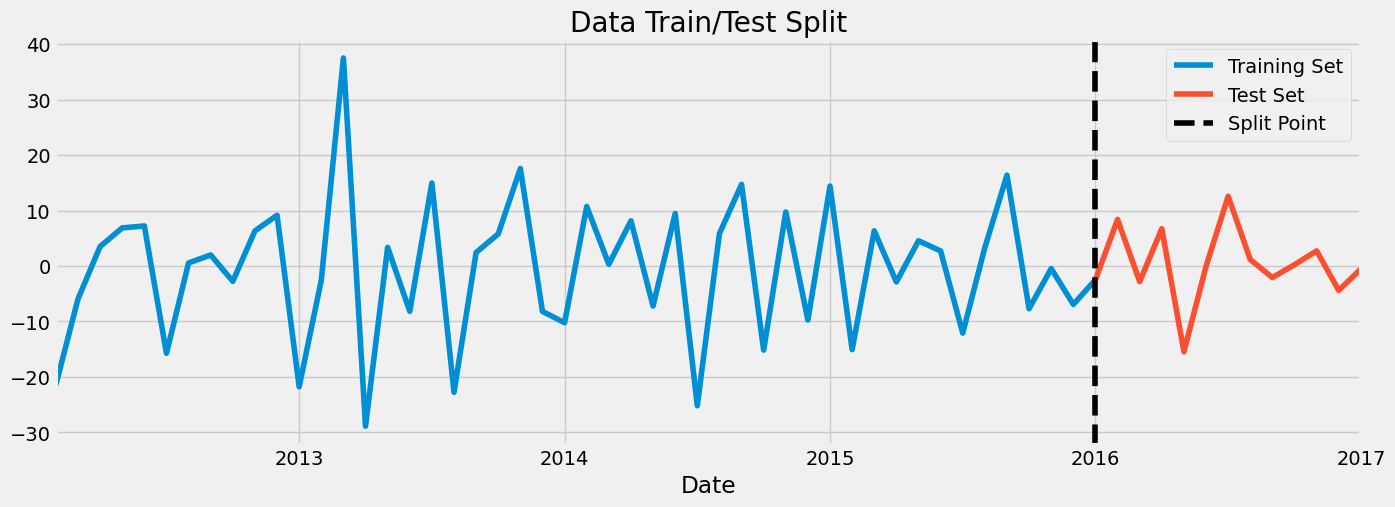

In [59]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

# Ensure these dates exist within your df_diff index
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# Print the shapes to verify if they contain data
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

# Proceed with plotting if both DataFrames have data
if not df_train.empty and not df_test.empty:
    fig, ax = plt.subplots(figsize=(15, 5))
    df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
    df_test.plot(ax=ax, label='Test Set')
    ax.axvline('01-01-2016', color='black', ls='--')
    ax.legend(['Training Set', 'Test Set','Split Point'])
    plt.show()
else:
    print("Error: Either df_train or df_test is empty. Check your date ranges.")

### 3) Import Libraries and fit the model

Shape of df_train: (48,)
Head of df_train:
 Date
2012-02-01   -21.436040
2012-03-01    -5.951057
2012-04-01     3.509677
2012-05-01     6.877419
2012-06-01     7.222581
Freq: MS, Name: Demand, dtype: float64
Shape of df_test: (13,)
Head of df_test:
 Date
2016-01-01    -2.483871
2016-02-01     8.394883
2016-03-01    -2.814238
2016-04-01     6.726882
2016-05-01   -15.468817
Freq: MS, Name: Demand, dtype: float64


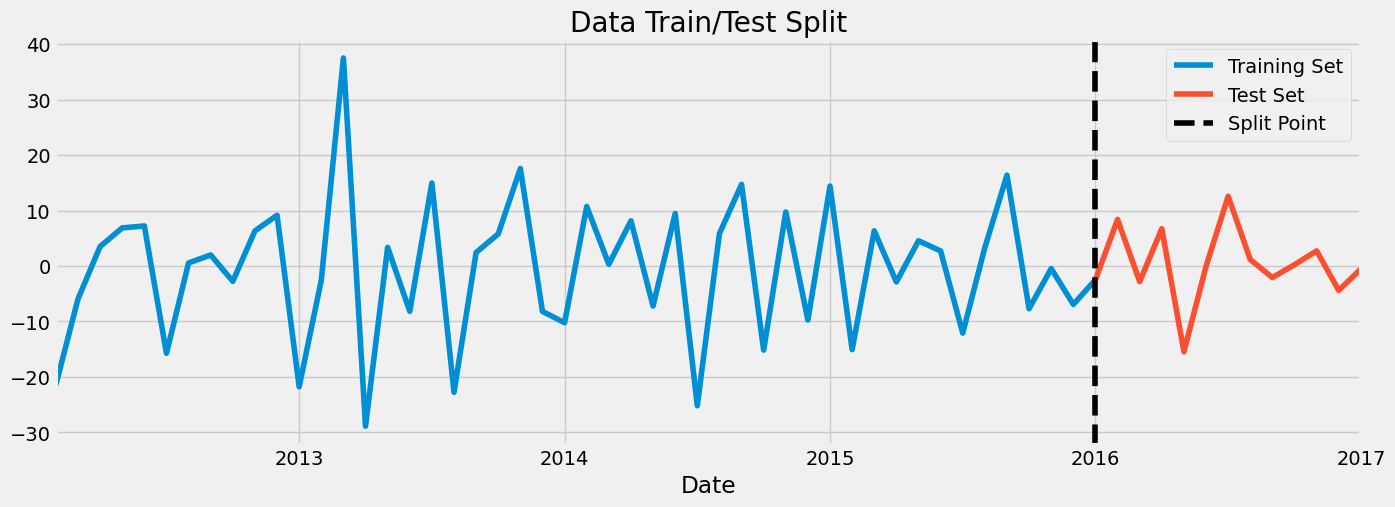

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -180.559
Date:                Mon, 19 Aug 2024   AIC                            369.118
Time:                        14:24:05   BIC                            376.519
Sample:                    02-01-2012   HQIC                           371.903
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6299      0.192     -3.280      0.001      -1.006      -0.254
ar.L2         -0.3582      0.130     -2.748      0.006      -0.614      -0.103
ma.L1         -0.9999     57.905     -0.017      0.9

In [60]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure these dates exist within your df_diff index and are in the correct order
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# Print the shapes to verify if they contain data and the head of the DataFrames
print("Shape of df_train:", df_train.shape)
print("Head of df_train:\n", df_train.head()) # Check the content of df_train
print("Shape of df_test:", df_test.shape)
print("Head of df_test:\n", df_test.head()) # Check the content of df_test

# Proceed with plotting and model fitting if both DataFrames have data
if not df_train.empty and not df_test.empty:
    fig, ax = plt.subplots(figsize=(15, 5))
    df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
    df_test.plot(ax=ax, label='Test Set')
    ax.axvline('01-01-2016', color='black', ls='--')
    ax.legend(['Training Set', 'Test Set','Split Point'])
    plt.show()

    # Fit the model
    model_arima = ARIMA(df_train, order = (2,1,1)).fit()
    print(model_arima.summary()) # Print the model summary to check if it fitted correctly
else:
    print("Error: Either df_train or df_test is empty. Check your date ranges and the content of df_diff.")

Shape of df_train: (48,)
Head of df_train:
 Date
2012-02-01   -21.436040
2012-03-01    -5.951057
2012-04-01     3.509677
2012-05-01     6.877419
2012-06-01     7.222581
Freq: MS, Name: Demand, dtype: float64
Shape of df_test: (13,)
Head of df_test:
 Date
2016-01-01    -2.483871
2016-02-01     8.394883
2016-03-01    -2.814238
2016-04-01     6.726882
2016-05-01   -15.468817
Freq: MS, Name: Demand, dtype: float64


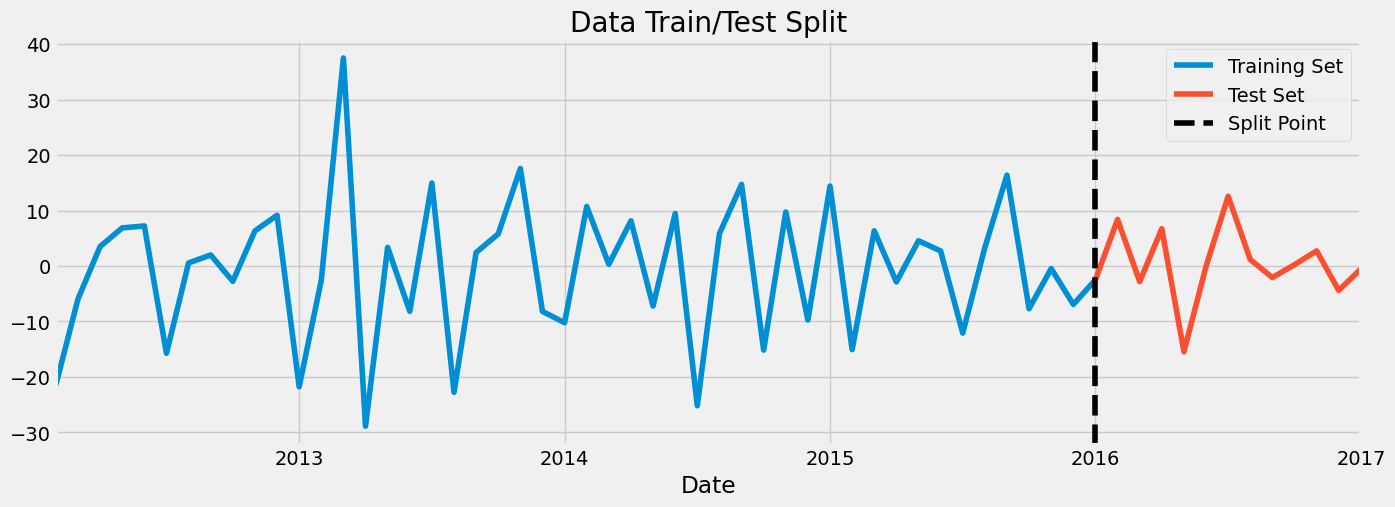

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -180.559
Date:                Mon, 19 Aug 2024   AIC                            369.118
Time:                        14:24:23   BIC                            376.519
Sample:                    02-01-2012   HQIC                           371.903
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6299      0.192     -3.280      0.001      -1.006      -0.254
ar.L2         -0.3582      0.130     -2.748      0.006      -0.614      -0.103
ma.L1         -0.9999     57.905     -0.017      0.9

In [61]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure these dates exist within your df_diff index and are in the correct order
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# Print the shapes to verify if they contain data and the head of the DataFrames
print("Shape of df_train:", df_train.shape)
print("Head of df_train:\n", df_train.head()) # Check the content of df_train
print("Shape of df_test:", df_test.shape)
print("Head of df_test:\n", df_test.head()) # Check the content of df_test

# Proceed with plotting and model fitting if both DataFrames have data
if not df_train.empty and not df_test.empty:
    fig, ax = plt.subplots(figsize=(15, 5))
    df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
    df_test.plot(ax=ax, label='Test Set')
    ax.axvline('01-01-2016', color='black', ls='--')
    ax.legend(['Training Set', 'Test Set','Split Point'])
    plt.show()

    # Fit the model and print summary
    model_arima = ARIMA(df_train, order = (2,1,1)).fit()
    print(model_arima.summary())

else:
    print("Error: Either df_train or df_test is empty. Check your date ranges and the content of df_diff.")

    Based on the summary:
    - The values of the coefficients for AR lag1, lag2 and MA lag1 are negatives which indicates that the time series
    current period is negatively correlated with the time series at those lags
    -The p values for AR lag 1 and MA lag 1, sigma2 are significants because it is below 0.05

Date
2012-02-01   -21.436040
2012-03-01    -5.951057
2012-04-01     3.509677
2012-05-01     6.877419
2012-06-01     7.222581
                ...    
2017-08-01    13.935484
2017-09-01    -1.933333
2017-10-01     1.901075
2017-11-01    -7.601075
2017-12-01     3.988172
Freq: MS, Name: Demand, Length: 71, dtype: float64
Shape of df_train: (48,)
Head of df_train:
 Date
2012-02-01   -21.436040
2012-03-01    -5.951057
2012-04-01     3.509677
2012-05-01     6.877419
2012-06-01     7.222581
Freq: MS, Name: Demand, dtype: float64
Shape of df_test: (13,)
Head of df_test:
 Date
2016-01-01    -2.483871
2016-02-01     8.394883
2016-03-01    -2.814238
2016-04-01     6.726882
2016-05-01   -15.468817
Freq: MS, Name: Demand, dtype: float64


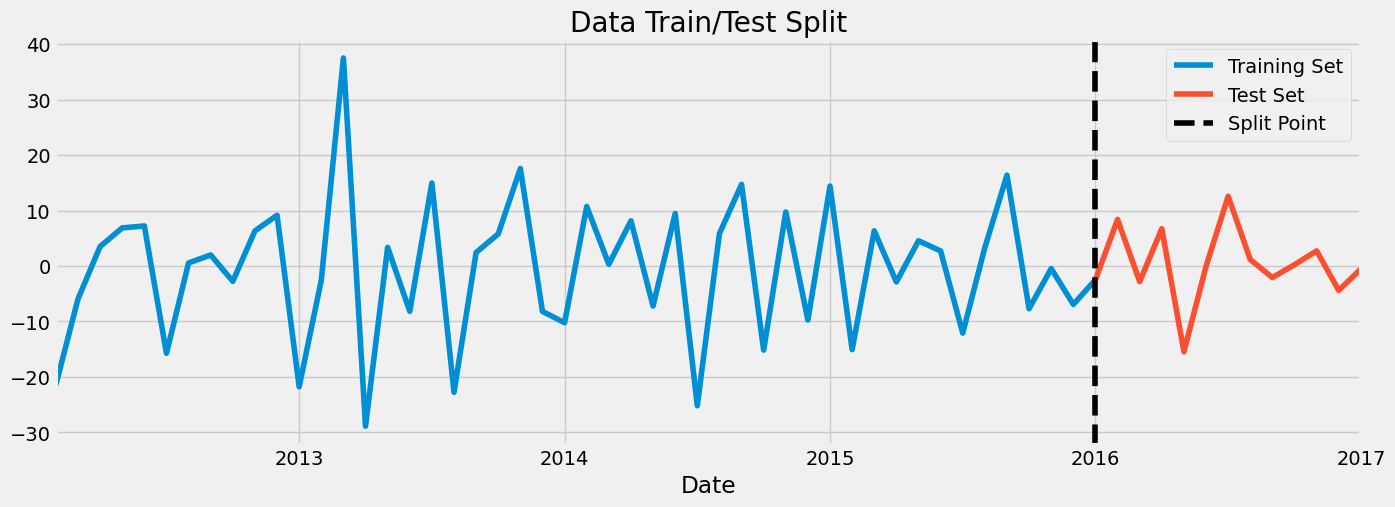

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -180.559
Date:                Mon, 19 Aug 2024   AIC                            369.118
Time:                        14:25:47   BIC                            376.519
Sample:                    02-01-2012   HQIC                           371.903
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6299      0.192     -3.280      0.001      -1.006      -0.254
ar.L2         -0.3582      0.130     -2.748      0.006      -0.614      -0.103
ma.L1         -0.9999     57.905     -0.017      0.9

In [62]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure these dates exist within your df_diff index and are in the correct order
# It is highly recommended to print df_diff and verify the dates
print(df_diff)
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# Print the shapes to verify if they contain data and the head of the DataFrames
print("Shape of df_train:", df_train.shape)
print("Head of df_train:\n", df_train.head()) # Check the content of df_train
print("Shape of df_test:", df_test.shape)
print("Head of df_test:\n", df_test.head()) # Check the content of df_test

# Proceed with plotting and model fitting if both DataFrames have data
if not df_train.empty and not df_test.empty:
    fig, ax = plt.subplots(figsize=(15, 5))
    df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
    df_test.plot(ax=ax, label='Test Set')
    ax.axvline('01-01-2016', color='black', ls='--')
    ax.legend(['Training Set', 'Test Set','Split Point'])
    plt.show()

    # Fit the model and print summary
    model_arima = ARIMA(df_train, order = (2,1,1)).fit()
    print(model_arima.summary())

    # get the predictions start and end dates
    # Handle the case where df_test might be empty to prevent the error
    if not df_test.empty:
        pred_start = df_test.index[0]
        pred_end= df_test.index[-1]

        # Make predictions
        prediction = model_arima.predict(start = pred_start, end = pred_end)

        # Get the residuals
        residuals = df_test - prediction
    else:
        print("Cannot make predictions: df_test is empty.")

else:
    print("Error: Either df_train or df_test is empty. Check your date ranges and the content of df_diff.")

   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500 
Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


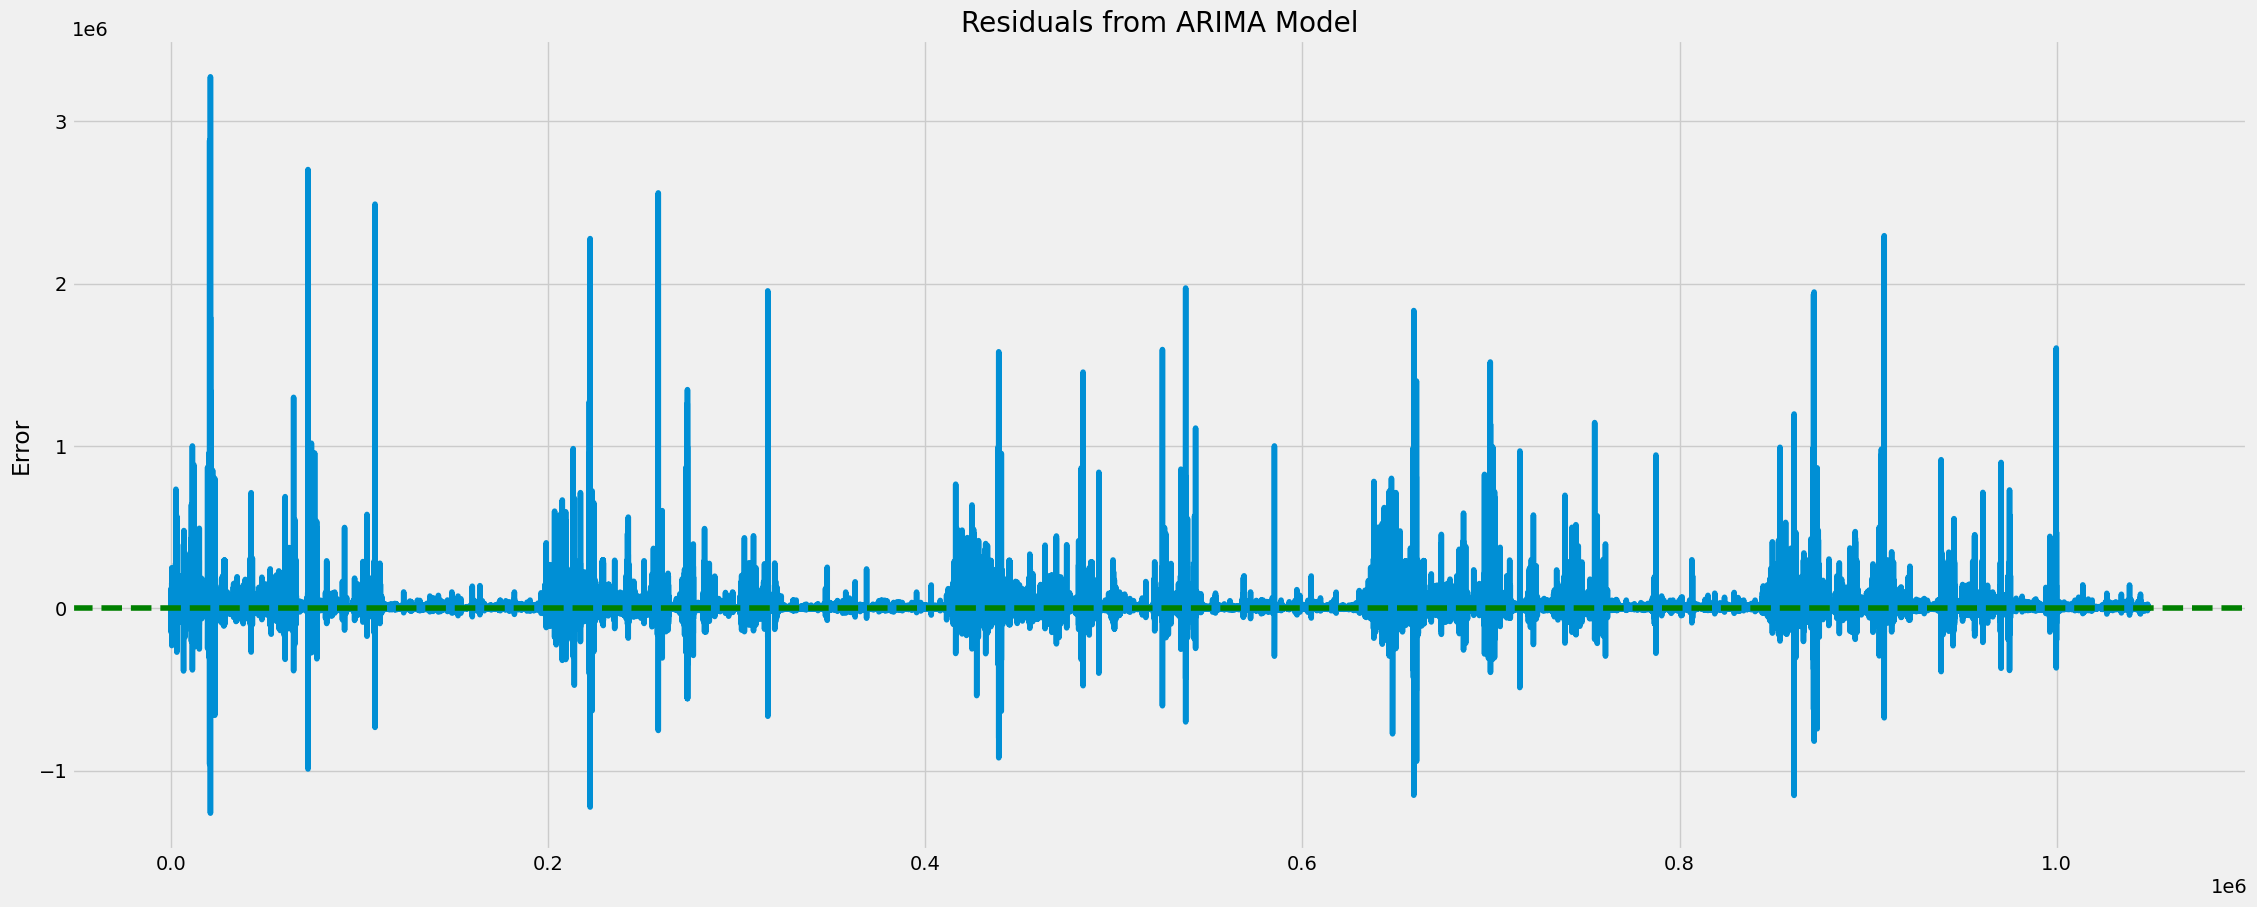

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df_month = pd.read_csv('/content/Historical Product Demand.csv')

# Print the first few rows and columns to inspect the data and column names
print(df_month.head())
print(df_month.columns)

# Replace 'Order_Demand' with the actual name of the column containing demand data
demand_column_name = 'Order_Demand'  # Update this if necessary

# Attempt to convert the demand column to numeric, coercing errors to NaN
df_month[demand_column_name] = pd.to_numeric(df_month[demand_column_name], errors='coerce')

# Drop rows with missing values in the demand column
df_month = df_month.dropna(subset=[demand_column_name])

# Fit the ARIMA model to your data
model_arima = ARIMA(df_month[demand_column_name], order=(1, 1, 1))
model_fit = model_arima.fit()

# Calculate the residuals
residuals = model_fit.resid

# Plot the residuals
residuals.plot(kind='line', title='Residuals from ARIMA Model')
plt.axhline(0, color='g', linestyle='--')
plt.ylabel('Error')
plt.show()